### Fake News Classifier
Dataset:  https://www.kaggle.com/c/fake-news/data#

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('F:/Data Science projects/By_krish/Fake_news/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.shape

(20800, 5)

In [6]:
#note we will consider only title for pre-processing

In [7]:
## Get the Independent Features

df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [8]:
ind_features=[col for col in df.columns if col!='label']

In [9]:
X=df[ind_features]

In [10]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [88]:
### gettting label distribution to check if there is imbalance situation in data or not
import seaborn as sns
def create_distribution(feature):
    return sns.countplot(df[feature] , palette='hls')

In [123]:
df.dtypes

id         int64
title     object
author    object
text      object
label     object
dtype: object

In [89]:
df['label']=df['label'].astype(str)

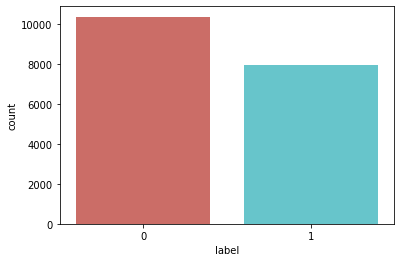

In [90]:
create_distribution('label')

In [11]:
## Get the Dependent features
y=df['label']

In [12]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [13]:
#as we have text so we have to perform some text pre processing(removing stopwords,some special characters])

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [14]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [15]:
df=df.dropna()

In [16]:
df.shape

(18285, 5)

In [17]:
df.isnull().values.any()

False

In [18]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [19]:
messages=df.copy()

In [20]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [21]:
#why to rset_index,bcz in above we can check,when we drop our rows get deleted as 6 and 8th so to make it in a order 
#ie 5 then 6 then 7

In [22]:
messages.reset_index(inplace=True)
#now we can see it is in order

In [23]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [24]:
messages.drop(['index','id'],axis=1,inplace=True)

In [25]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [26]:
len(messages)

18285

In [27]:
messages.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [28]:
data=messages['title'][0]
data

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [29]:
import re
data=re.sub('[^a-zA-Z]',' ',data)
data

'House Dem Aide  We Didn t Even See Comey s Letter Until Jason Chaffetz Tweeted It'

In [30]:
data=data.lower()
data

'house dem aide  we didn t even see comey s letter until jason chaffetz tweeted it'

In [31]:
list=data.split()
list

['house',
 'dem',
 'aide',
 'we',
 'didn',
 't',
 'even',
 'see',
 'comey',
 's',
 'letter',
 'until',
 'jason',
 'chaffetz',
 'tweeted',
 'it']

In [32]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [33]:
ps=PorterStemmer()

In [34]:
review=[ps.stem(word) for word in list if word not in set(stopwords.words('english'))]
review

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [35]:
'''review=[]
for word in list:
    if word not in set(stopwords.words('english')):
        review.append(ps.stem(word))
review'''

['hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet']

In [36]:
' '.join(review)

'hous dem aid even see comey letter jason chaffetz tweet'

In [37]:
### lets do same task for each & every row

In [38]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
sentences=[]
for i in range(0, len(messages)):
    #remove all the special char 
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    sentences= ' '.join(review)
    corpus.append(sentences)

In [39]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [40]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [41]:
len(corpus)

18285

In [42]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [43]:
## Applying Countvectorizer
# Creating the Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

## max_features=5000, it means I just need top 5000 features 
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words, e.g( 'access pipelin protest','abus new york')

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [44]:
X.shape
#ie we get 5000 features now

(18285, 5000)

In [45]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
y=messages['label']

In [47]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [106]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
#example ABC News is basically 2 words,so in ngram,i have Given (1,3),so it will take the combination of 1 word,then 2 words 
#then 3 words, e.g( 'access pipelin protest','abus new york')

In [49]:
#if we want to see top 20 features name by ngram_range

cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

In [50]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [51]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [52]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### MultinomialNB Algorithm

In [53]:
#this algo works well with text data

In [54]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [55]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [56]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
print(cm)


accuracy:   0.903
[[2313  270]
 [ 174 1815]]


([<matplotlib.axis.YTick at 0x77139adc88>,
 [Text(0, 0, 'positive'), Text(0, 0, 'negative')])

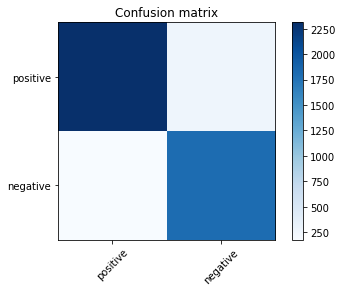

In [58]:
### make your confusion amtrix more user-friendly
import numpy as np
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion matrix')
labels=["positive", "negative"]
tick_marks=np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

In [59]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

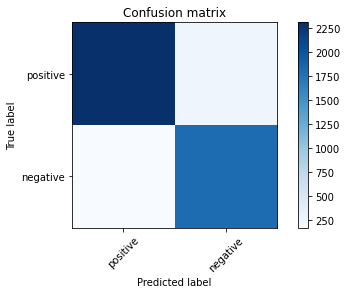

In [60]:
plot_confusion_matrix(cm)

In [61]:

score = metrics.accuracy_score(y_test, pred)
score

0.9028871391076115

In [63]:
y_train.shape

(13713,)

### Passive Aggressive Classifier Algorithm

In [ ]:
#this algo works well with text data and is basically used for text data

In [108]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

In [109]:
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
cm


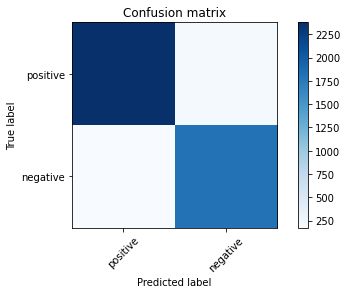

In [66]:
plot_confusion_matrix(cm)

In [119]:
## Get Features names
#to detect which fake and which is most real word
feature_names = cv.get_feature_names()

In [121]:
#most negative value is most fake word,if we go towards lower value in -ve,ie we have most fake value
classifier.coef_[0]

array([ -9.19270579,  -8.60491913,  -9.19270579, ..., -10.80214371,
        -8.85623356,  -9.41584934])

In [120]:
### Most 20 real values
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-7.138582059068827, 'video'),
 (-7.506306839194144, 'would'),
 (-7.711101251840157, 'hollywood'),
 (-8.237194347736937, 'north'),
 (-8.499558612204428, 'trump'),
 (-8.604919127862253, 'bombed'),
 (-8.722702163518637, 'lack'),
 (-9.192705792764373, 'mason'),
 (-9.192705792764373, 'love'),
 (-9.192705792764373, 'jackie'),
 (-9.192705792764373, 'exclusive'),
 (-9.192705792764373, 'breitbart'),
 (-9.192705792764373, 'bathrooms'),
 (-9.415849344078582, 'if'),
 (-10.108996524638528, 'trans'),
 (-10.108996524638528, 'he'),
 (-10.802143705198473, 'over'),
 (-10.802143705198473, 'of'),
 (-10.802143705198473, 'korea')]

In [122]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.802143705198473, 'korea'),
 (-10.802143705198473, 'of'),
 (-10.802143705198473, 'over'),
 (-10.108996524638528, 'he'),
 (-10.108996524638528, 'trans'),
 (-9.415849344078582, 'if'),
 (-9.192705792764373, 'bathrooms'),
 (-9.192705792764373, 'breitbart'),
 (-9.192705792764373, 'exclusive'),
 (-9.192705792764373, 'jackie'),
 (-9.192705792764373, 'love'),
 (-9.192705792764373, 'mason'),
 (-8.722702163518637, 'lack'),
 (-8.604919127862253, 'bombed'),
 (-8.499558612204428, 'trump'),
 (-8.237194347736937, 'north'),
 (-7.711101251840157, 'hollywood'),
 (-7.506306839194144, 'would'),
 (-7.138582059068827, 'video')]